# Install libraries and packages

In [1]:
from imutils import paths
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import random
import os
import tensorflow_hub as hub

2023-08-22 13:33:48.015267: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-22 13:33:48.042622: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-22 13:33:49.261875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Extract Aff-Wild2 Data (Core Data)

In [2]:
images_path = list(paths.list_images('/Users/janrauhl/Downloads/batch1'))
images_path.append(list(paths.list_images('/Users/janrauhl/Downloads/batch2')))
len(images_path)

1653866

In [3]:
train_folder = '/Users/janrauhl/Downloads/batch1'
train_folder2 = '/Users/janrauhl/Downloads/batch2'

train_label_folder = '/Users/janrauhl/Documents/Dissertation/Database Access/Aff-Wild2/aff_annotations/EXPR_Classification_Challenge/Train_Set'
train_labels = os.listdir(train_label_folder) #label files list
train_labels = [os.path.splitext(file)[0] for file in train_labels]


val_label_folder = '/Users/janrauhl/Documents/Dissertation/Database Access/Aff-Wild2/aff_annotations/EXPR_Classification_Challenge/Validation_Set'
val_labels = os.listdir(val_label_folder)
val_labels = [os.path.splitext(file)[0] for file in val_labels] #label files list

In [4]:
import os

folder_path = '/Users/janrauhl/Downloads/batch1/84-30-1920x1080'
frame_dir = os.listdir(folder_path)
frame_dir.sort()
print(frame_dir)


['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg', '00025.jpg', '00026.jpg', '00027.jpg', '00028.jpg', '00029.jpg', '00030.jpg', '00031.jpg', '00032.jpg', '00033.jpg', '00034.jpg', '00035.jpg', '00036.jpg', '00037.jpg', '00038.jpg', '00039.jpg', '00040.jpg', '00041.jpg', '00042.jpg', '00043.jpg', '00044.jpg', '00045.jpg', '00046.jpg', '00047.jpg', '00048.jpg', '00049.jpg', '00050.jpg', '00051.jpg', '00052.jpg', '00053.jpg', '00054.jpg', '00055.jpg', '00056.jpg', '00057.jpg', '00058.jpg', '00059.jpg', '00060.jpg', '00061.jpg', '00062.jpg', '00063.jpg', '00064.jpg', '00065.jpg', '00066.jpg', '00067.jpg', '00068.jpg', '00069.jpg', '00070.jpg', '00071.jpg', '00072.jpg', '00073.jpg', '00074.jpg', '00075.jpg', '00076.jpg', '00077.jpg'

In [5]:
#create dictionary for train and val set
train_mapped = {}
val_mapped = {}

def getData(folder_source):
    video_folder = os.listdir(folder_source)
    video_folder = [folder for folder in video_folder if folder != '.DS_Store'] #ignore autogenerated files by MacOS
    for i in video_folder: #for video i 
        frame_folder = os.path.join(folder_source + '/' + i) #get the exact folder path for video i 
        frame_dir = os.listdir(frame_folder) #get the list of frames for video i 
        frame_dir.sort() #sort the frames
        if i in train_labels: 
            label_file_path = os.path.join (train_label_folder, i + '.txt')
            with open (label_file_path,'r') as file: 
                label_content = file.readlines()[1:] #skip first line 
                label_content = [label.rstrip('\n') for label in label_content]
            for frame, row in zip(frame_dir, label_content): #map frames with annotated label
                path = os.path.join(frame_folder,frame)
                train_mapped[path] = row #file path as key, label as value
        elif i in val_labels: 
            label_file_path = os.path.join (val_label_folder, i + '.txt')
            with open (label_file_path,'r') as file: 
                label_content = file.readlines()[1:] #skip first line 
                label_content = [label.rstrip('\n') for label in label_content]
            for frame, row in zip(frame_dir, label_content): #map frames with annotated label
                path = os.path.join(frame_folder,frame)
                val_mapped[path] = row #file path as key, label as value
        else: 
            continue #ignore not annotated videos      

In [6]:
getData(train_folder)
getData(train_folder2)

In [7]:
print(len(train_mapped), len(val_mapped), len(train_mapped) + len(val_mapped))

1087601 438490 1526091


In [8]:
print(len(train_mapped), len(val_mapped), len(train_mapped) + len(val_mapped))

1087601 438490 1526091


In [9]:
num_lines_to_print = 20
count = 0
for key, value in train_mapped.items():
    print(f"{key}: {value}")
    count += 1
    if count >= num_lines_to_print:
        break

/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00001.jpg: 0
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00002.jpg: 0
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00003.jpg: 0
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00004.jpg: 0
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00005.jpg: 0
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00006.jpg: -1
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00007.jpg: -1
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00008.jpg: -1
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00009.jpg: -1
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00010.jpg: -1
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00011.jpg: -1
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00012.jpg: -1
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00013.jpg: -1
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00014.jpg: -1
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00015.jpg: -1
/Users/janrauhl/Downloads/batch1/84-30-1920x1080/00016.jpg: 

In [10]:
num_lines_to_print = 20
count = 0
for key, value in val_mapped.items():
    print(f"{key}: {value}")
    count += 1
    if count >= num_lines_to_print:
        break

/Users/janrauhl/Downloads/batch1/135/00001.jpg: 0
/Users/janrauhl/Downloads/batch1/135/00002.jpg: 0
/Users/janrauhl/Downloads/batch1/135/00003.jpg: 0
/Users/janrauhl/Downloads/batch1/135/00004.jpg: 0
/Users/janrauhl/Downloads/batch1/135/00005.jpg: 0
/Users/janrauhl/Downloads/batch1/135/00006.jpg: 0
/Users/janrauhl/Downloads/batch1/135/00007.jpg: 0
/Users/janrauhl/Downloads/batch1/135/00008.jpg: 0
/Users/janrauhl/Downloads/batch1/135/00009.jpg: -1
/Users/janrauhl/Downloads/batch1/135/00010.jpg: -1
/Users/janrauhl/Downloads/batch1/135/00011.jpg: -1
/Users/janrauhl/Downloads/batch1/135/00012.jpg: -1
/Users/janrauhl/Downloads/batch1/135/00013.jpg: -1
/Users/janrauhl/Downloads/batch1/135/00014.jpg: -1
/Users/janrauhl/Downloads/batch1/135/00015.jpg: -1
/Users/janrauhl/Downloads/batch1/135/00016.jpg: -1
/Users/janrauhl/Downloads/batch1/135/00017.jpg: -1
/Users/janrauhl/Downloads/batch1/135/00018.jpg: -1
/Users/janrauhl/Downloads/batch1/135/00019.jpg: -1
/Users/janrauhl/Downloads/batch1/135/00

In [11]:
train_img = list(train_mapped.keys())
train_lab = list(train_mapped.values())
val_img = list(val_mapped.keys())
val_lab = list(val_mapped.values())

In [12]:
# Assuming you have a dictionary called file_paths_with_labels with file paths as keys and corresponding labels as values
# file_paths_with_labels = {'file_path1': 'label1', 'file_path2': 'label2', ...}

# Create a dictionary to store the file counts for each label
label_counts = {}

# Iterate through the dictionary to count files for each label
for label in train_mapped.values():
    label_counts[label] = label_counts.get(label, 0) + 1

# Print the file counts for each label
for label, count in label_counts.items():
    print(f"Label '{label}': {count} files")


Label '0': 178309 files
Label '-1': 503597 files
Label '4': 93427 files
Label '6': 31911 files
Label '7': 165378 files
Label '5': 78157 files
Label '3': 9110 files
Label '1': 16776 files
Label '2': 10936 files


In [13]:
# Assuming you have a dictionary called file_paths_with_labels with file paths as keys and corresponding labels as values
# file_paths_with_labels = {'file_path1': 'label1', 'file_path2': 'label2', ...}

# Create a dictionary to store the file counts for each label
label_counts = {}

# Iterate through the dictionary to count files for each label
for label in val_mapped.values():
    label_counts[label] = label_counts.get(label, 0) + 1

# Print the file counts for each label
for label, count in label_counts.items():
    print(f"Label '{label}': {count} files")


Label '0': 82115 files
Label '-1': 164414 files
Label '7': 105168 files
Label '4': 30969 files
Label '6': 10914 files
Label '2': 5322 files
Label '1': 6059 files
Label '3': 8453 files
Label '5': 25076 files


In [17]:
def filter(input_dict, remove): 
    filtered_dict = {key:value for key,value in input_dict.items() if value not in remove}
    return filtered_dict 

remove = {'-1','0','7'}
filtered_train = filter(train_mapped,remove)
filtered_val = filter(val_mapped,remove)

In [19]:
len(train_mapped),len(filtered_train),len(val_mapped),len(filtered_val)

(1087601, 240317, 438490, 86793)

In [20]:
train_mapped = filtered_train
val_mapped = filtered_val 

In [29]:
# Assuming you have a dictionary called file_paths_with_labels with file paths as keys and corresponding labels as values
# file_paths_with_labels = {'file_path1': 'label1', 'file_path2': 'label2', ...}

# Create a dictionary to store the file counts for each label
label_counts = {}
counter = 0

# Iterate through the dictionary to count files for each label
for label in train_mapped.values():
    label_counts[label] = label_counts.get(label, 0) + 1

# Print the file counts for each label
for label, count in label_counts.items():
    print(f"Label '{label}': {count} files")
    counter += count
    print(counter)
    


Label '4': 93427 files
93427
Label '6': 31911 files
125338
Label '5': 78157 files
203495
Label '3': 9110 files
212605
Label '1': 16776 files
229381
Label '2': 10936 files
240317


### Aff-Wild2 Train

In [26]:
########## ONLY RUN ONCE

import os
import shutil

external = '/Users/janrauhl/Documents/Dissertation/Database Access/Affwild2/'
main_directory = os.path.join(external,'aff_train')  

# Create the main directory if it doesn't exist
if not os.path.exists(main_directory):
    os.makedirs(main_directory)

# Iterate through the dictionary and create directories for each label
for file_path, label in train_mapped.items():
    # Create the label directory if it doesn't exist
    label_directory = os.path.join(main_directory, label)
    if not os.path.exists(label_directory):
        os.makedirs(label_directory)

    # Get the base name of the file (the file name without the path)
    file_name = os.path.basename(file_path)

    # Get the base name of the directory containing the file
    dir_name = os.path.basename(os.path.dirname(file_path))

    # Combine the directory name and the file name to create a new unique filename
    new_file_name = f"{dir_name}_{file_name}"

    # Move the file to the label directory with the new filename
    shutil.move(file_path, os.path.join(label_directory, new_file_name))

print('Done organising dataset directory')


Done organising dataset directory


### Aff-Wild2 Validation

In [27]:
########## ONLY RUN ONCE

external = '/Users/janrauhl/Documents/Dissertation/Database Access/Affwild2/'
main_directory = os.path.join(external,'aff_val')  
# Create the main directory if it doesn't exist
if not os.path.exists(main_directory):
    os.makedirs(main_directory)

# Iterate through the dictionary and create directories for each label
for file_path, label in val_mapped.items():
    # Create the label directory if it doesn't exist
    label_directory = os.path.join(main_directory, label)
    if not os.path.exists(label_directory):
        os.makedirs(label_directory)

    # Get the base name of the file (the file name without the path)
    file_name = os.path.basename(file_path)

    # Get the base name of the directory containing the file
    dir_name = os.path.basename(os.path.dirname(file_path))

    # Combine the directory name and the file name to create a new unique filename
    new_file_name = f"{dir_name}_{file_name}"

    # Move the file to the label directory with the new filename
    shutil.move(file_path, os.path.join(label_directory, new_file_name))
    
    
    
    
print('Done organising dataset directory')


Done organising dataset directory


# Extract CK+ Data (only fear and disgust for up-sampling)

In [57]:
#create dictionary for train and val set
ck_mapped = {}
def getDataCK(folder_source, label_source):
    labels = [] 
    label_folder = os.listdir(label_source)
    label_folder = [folder for folder in label_folder if folder != '.DS_Store' and not folder.startswith('._')] #ignore autogenerated files by MacOS
    for i in label_folder: #for video i 
        label_vid_folder = os.path.join(label_source + '/' + i) #get the exact label folder path for video i 
        all_vid = [file for file in os.listdir(label_vid_folder) if file != '.DS_Store' and not file.startswith('._')]
        for j in all_vid:
            label_exp_file = os.path.join(label_vid_folder + '/' + j) #exact label file for video i  
            label_exp_dir = [file for file in os.listdir(label_exp_file) if file != '.DS_Store' and not file.startswith('._')] #get the list of frames for expression video i 
            if bool(label_exp_dir) is True: 
                label_full_dir = os.path.join(label_exp_file, label_exp_dir[0])
                labels.append(label_full_dir)

    
    video_folder = [file for file in os.listdir(folder_source) if file != '.DS_Store' and not file.startswith('._')]
    video_folder = [folder for folder in video_folder if folder != '.DS_Store'] #ignore autogenerated files by MacOS
    for i in video_folder: #for video i 
        vid_folder = os.path.join(folder_source, i) #get the exact folder path for video i 
        vid_folder_list = [file for file in os.listdir(vid_folder) if file != '.DS_Store' and not file.startswith('._')]
        for j in vid_folder_list:
            exp_folder = os.path.join(vid_folder + '/' + j) 
            exp_dir = [file for file in os.listdir(exp_folder) if file != '.DS_Store' and not file.startswith('._')] #get the list of frames for expression video i 
            exp_dir = sorted(exp_dir, key=lambda x: int(x.split('_')[-1].split('.')[0]))
            last_frame = exp_dir[-1]
            last_frame_dir = os.path.join(exp_folder,last_frame)
            frame_name = last_frame.replace('.png','')
            frame_name = frame_name + '_emotion.txt'
            find_label_dir = os.path.join(label_source,i,j,frame_name)
            
            if find_label_dir in labels: 
                with open (find_label_dir,'r') as file: 
                    label_content = file.readlines()
                    for line in label_content: 
                        lab = line.strip() 
                        lab = int(float(lab))
                    ck_mapped[last_frame_dir] = lab

In [58]:
getDataCK('CK+/cohn-kanade-images', 'CK+/Emotion' )

In [60]:
len(ck_mapped)

327

In [62]:
########## ONLY RUN ONCE
import os
import shutil
external = 'CK+'
main_directory = os.path.join(external,'extracted')  
# Create the main directory if it doesn't exist
if not os.path.exists(main_directory):
    os.makedirs(main_directory)

# Iterate through the dictionary and create directories for each label
for file_path, label in ck_mapped.items():
    # Create the label directory if it doesn't exist
    label_directory = os.path.join(main_directory, str(label))
    if not os.path.exists(label_directory):
        os.makedirs(label_directory)
        
    # Get the base name of the file (the file name without the path)
    file_name = os.path.basename(file_path)
    
    # Move the file to the label directory with the new filename
    shutil.move(file_path, os.path.join(label_directory, file_name))
      
    
print('Done organising dataset directory')


Done organising dataset directory


# Extract JAFFE Data (only fear and disgust for up-sampling)

In [4]:
a = '1 2.87 2.52 2.10 1.97 1.97 2.06 KM-NE1' 

In [5]:
b = a.split() 
print(b)

['1', '2.87', '2.52', '2.10', '1.97', '1.97', '2.06', 'KM-NE1']


In [6]:
c= 'KA.AN1.39.tiff'

In [7]:
c.split()

['KA.AN1.39.tiff']

In [22]:
import re
pattern = r'\b\d+\b' 
m = re.findall(pattern,c)
for a in m: 
    print (a)

39


In [42]:
jaf_label = '/Users/janrauhl/Documents/Dissertation/Database-Access/JAFFE/jaffedbase/A_README_FIRST.txt'
with open (jaf_label,'r') as file: 
    jaf_label_content = file.readlines()
#     jaf_label_content = jaf_label_content[47:466]

In [40]:
len(jaf_label_content)

419

In [41]:
jaf_label_content

['1 2.87 2.52 2.10 1.97 1.97 2.06 KM-NE1\n',
 '2 2.87 2.42 1.58 1.84 1.77 1.77 KM-NE2\n',
 '3 2.50 2.10 1.70 1.50 1.73 1.53 KM-NE3\n',
 '4 4.90 1.13 1.26 1.10 1.03 1.10 KM-HA1\n',
 '5 4.87 1.20 1.43 1.03 1.07 1.07 KM-HA2\n',
 '6 4.61 1.32 1.39 1.23 1.10 1.19 KM-HA3\n',
 '7 5.00 1.13 1.26 1.10 1.10 1.06 KM-HA4\n',
 '8 4.65 1.29 1.39 1.23 1.16 1.16 KM-HA5\n',
 '9 1.42 4.00 1.55 2.39 3.26 3.03 KM-SA1\n',
 '10 1.23 4.39 1.45 2.61 3.19 2.71 KM-SA2\n',
 '11 1.32 4.00 1.87 2.60 3.77 3.19 KM-SA3\n',
 '12 1.26 4.29 1.58 2.26 3.39 2.94 KM-SA4\n',
 '13 1.35 4.13 1.61 2.10 3.81 3.10 KM-SA5\n',
 '14 2.13 1.55 4.97 1.65 1.45 2.10 KM-SU1\n',
 '15 2.16 1.90 4.97 1.74 1.81 3.10 KM-SU2\n',
 '16 2.16 1.84 4.94 1.71 1.65 2.32 KM-SU3\n',
 '17 1.39 2.03 1.57 4.58 3.77 1.68 KM-AN1\n',
 '18 1.45 2.84 1.68 4.06 3.87 1.90 KM-AN2\n',
 '19 1.42 2.13 1.55 4.16 3.58 1.77 KM-AN3\n',
 '20 1.26 2.10 1.81 3.52 4.71 2.26 KM-DI1\n',
 '21 1.55 2.13 1.74 3.16 4.32 2.13 KM-DI2\n',
 '22 1.39 1.87 1.94 3.61 4.58 1.94 KM-DI3\n

In [47]:
jaf_label_content[47:266]

['1 2.87 2.52 2.10 1.97 1.97 2.06 KM-NE1\n',
 '2 2.87 2.42 1.58 1.84 1.77 1.77 KM-NE2\n',
 '3 2.50 2.10 1.70 1.50 1.73 1.53 KM-NE3\n',
 '4 4.90 1.13 1.26 1.10 1.03 1.10 KM-HA1\n',
 '5 4.87 1.20 1.43 1.03 1.07 1.07 KM-HA2\n',
 '6 4.61 1.32 1.39 1.23 1.10 1.19 KM-HA3\n',
 '7 5.00 1.13 1.26 1.10 1.10 1.06 KM-HA4\n',
 '8 4.65 1.29 1.39 1.23 1.16 1.16 KM-HA5\n',
 '9 1.42 4.00 1.55 2.39 3.26 3.03 KM-SA1\n',
 '10 1.23 4.39 1.45 2.61 3.19 2.71 KM-SA2\n',
 '11 1.32 4.00 1.87 2.60 3.77 3.19 KM-SA3\n',
 '12 1.26 4.29 1.58 2.26 3.39 2.94 KM-SA4\n',
 '13 1.35 4.13 1.61 2.10 3.81 3.10 KM-SA5\n',
 '14 2.13 1.55 4.97 1.65 1.45 2.10 KM-SU1\n',
 '15 2.16 1.90 4.97 1.74 1.81 3.10 KM-SU2\n',
 '16 2.16 1.84 4.94 1.71 1.65 2.32 KM-SU3\n',
 '17 1.39 2.03 1.57 4.58 3.77 1.68 KM-AN1\n',
 '18 1.45 2.84 1.68 4.06 3.87 1.90 KM-AN2\n',
 '19 1.42 2.13 1.55 4.16 3.58 1.77 KM-AN3\n',
 '20 1.26 2.10 1.81 3.52 4.71 2.26 KM-DI1\n',
 '21 1.55 2.13 1.74 3.16 4.32 2.13 KM-DI2\n',
 '22 1.39 1.87 1.94 3.61 4.58 1.94 KM-DI3\n

In [48]:
jaf_label_content = jaf_label_content[47:266]

In [70]:
import re
pattern = r'\b\d+\b' 
jaf_img_dir = '/Users/janrauhl/Documents/Dissertation/Database-Access/JAFFE/jaffedbase'
jaf_img_list = os.listdir(jaf_img_dir)
jaf_img_list = [file for file in jaf_img_list if file != '.DS_Store' 
                and file != 'Thumbs.db' and file!= 'A_README_FIRST.txt']
img_dir = {}
#extract corresponding id number for each images
for i in jaf_img_list:
    matches = re.findall(pattern, i)
    for a in matches: 
        jaf_path = os.path.join(jaf_img_dir, i)
        img_dir[jaf_path] = a 
 
#extract labels for each image id 
labels = {} 
for x in jaf_label_content: 
    lines = x.split() 
    score = lines[1:7] #score for each emotion categoy
    rank = [] 
    for n in score: 
        rank.append(float(n)) #convert to float and find max 
    labels[lines[0]] = rank.index(max(rank)) #key: img id number, value: category with highest score
    
print(labels)
print(img_dir)
jaf_mapped = {}
for key in img_dir: 
    if img_dir[key] in labels: 
        jaf_mapped[key] = labels[img_dir[key]]
        
        
print(jaf_mapped)
    


        
    
    

{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 1, '10': 1, '11': 1, '12': 1, '13': 1, '14': 2, '15': 2, '16': 2, '17': 3, '18': 3, '19': 3, '20': 4, '21': 4, '22': 4, '23': 4, '24': 5, '25': 4, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 0, '33': 1, '34': 1, '35': 1, '36': 2, '37': 2, '38': 2, '39': 3, '40': 3, '41': 4, '42': 4, '43': 4, '44': 4, '45': 5, '46': 4, '47': 2, '48': 2, '49': 1, '50': 0, '51': 0, '52': 0, '53': 0, '54': 0, '55': 1, '56': 1, '57': 1, '58': 2, '59': 2, '60': 2, '61': 3, '62': 3, '63': 3, '64': 4, '65': 4, '66': 4, '67': 1, '68': 5, '69': 1, '70': 2, '71': 3, '72': 3, '73': 3, '74': 0, '75': 0, '76': 0, '77': 1, '78': 1, '79': 1, '80': 2, '81': 2, '82': 2, '83': 3, '84': 3, '85': 3, '86': 4, '87': 4, '88': 3, '89': 2, '90': 2, '91': 2, '92': 0, '93': 0, '94': 0, '95': 0, '96': 0, '97': 0, '98': 1, '99': 1, '100': 1, '101': 2, '102': 2, '103': 2, '104': 0, '105': 3, '106': 4, '107': 4, '108': 0, '109': 4, '110': 5, '111': 

In [71]:
########## ONLY RUN ONCE
import os
import shutil
external = '/Users/janrauhl/Documents/Dissertation/Database-Access/JAFFE'
main_directory = os.path.join(external,'extracted')  
# Create the main directory if it doesn't exist
if not os.path.exists(main_directory):
    os.makedirs(main_directory)

# Iterate through the dictionary and create directories for each label
for file_path, label in jaf_mapped.items():
    # Create the label directory if it doesn't exist
    label_directory = os.path.join(main_directory, str(label))
    if not os.path.exists(label_directory):
        os.makedirs(label_directory)
        
    # Get the base name of the file (the file name without the path)
    file_name = os.path.basename(file_path)
    
    # Move the file to the label directory with the new filename
    shutil.move(file_path, os.path.join(label_directory, file_name))
      
    
print('Done organising dataset directory')

Done organising dataset directory


In [ ]:
#create dictionary for train and val set
ck_mapped = {}
def getDataCK(folder_source, label_source):
    labels = [] 
    label_folder = os.listdir(label_source)
    label_folder = [folder for folder in label_folder if folder != '.DS_Store' and not folder.startswith('._')] #ignore autogenerated files by MacOS
    for i in label_folder: #for video i 
        label_vid_folder = os.path.join(label_source + '/' + i) #get the exact label folder path for video i 
        all_vid = [file for file in os.listdir(label_vid_folder) if file != '.DS_Store' and not file.startswith('._')]
        for j in all_vid:
            label_exp_file = os.path.join(label_vid_folder + '/' + j) #exact label file for video i  
            label_exp_dir = [file for file in os.listdir(label_exp_file) if file != '.DS_Store' and not file.startswith('._')] #get the list of frames for expression video i 
            if bool(label_exp_dir) is True: 
                label_full_dir = os.path.join(label_exp_file, label_exp_dir[0])
                labels.append(label_full_dir)

    
    video_folder = [file for file in os.listdir(folder_source) if file != '.DS_Store' and not file.startswith('._')]
    video_folder = [folder for folder in video_folder if folder != '.DS_Store'] #ignore autogenerated files by MacOS
    for i in video_folder: #for video i 
        vid_folder = os.path.join(folder_source, i) #get the exact folder path for video i 
        vid_folder_list = [file for file in os.listdir(vid_folder) if file != '.DS_Store' and not file.startswith('._')]
#         print(vid_folder_list)
        for j in vid_folder_list:
            exp_folder = os.path.join(vid_folder + '/' + j) 
            exp_dir = [file for file in os.listdir(exp_folder) if file != '.DS_Store' and not file.startswith('._')] #get the list of frames for expression video i 
            last_frame = exp_dir[-1]
            last_frame_dir = os.path.join(exp_folder,last_frame)
            frame_name = last_frame.replace('.png','')
            frame_name = frame_name + '_emotion.txt'
            find_label_dir = os.path.join(label_source,i,j,frame_name)
            
            if find_label_dir in labels: 
                with open (find_label_dir,'r') as file: 
                    label_content = file.readlines()
                    for line in label_content: 
                        lab = line.strip() 
                        lab = int(float(lab))
                    ck_mapped[last_frame_dir] = lab

# ADFES

In [20]:
adfes = 'ADFES/Apex Stills'
adfes_files = os.listdir(adfes) 

In [21]:
import re
adfes_dict = {}
for i in adfes_files: 
    match = re.findall(r'-(\w+)-Apex', i) 
    if match: 
        emotion = match[0].lower() 
        adfes_path = os.path.join(adfes, i) 
        adfes_dict[adfes_path] = emotion 
adfes_dict
     

{'ADFES/Apex Stills/M10-Surprise-Apex.jpg': 'surprise',
 'ADFES/Apex Stills/M10-Sad-Apex.jpg': 'sad',
 'ADFES/Apex Stills/M10-Pride-Apex.jpg': 'pride',
 'ADFES/Apex Stills/M10-Joy-Apex.jpg': 'joy',
 'ADFES/Apex Stills/M10-Fear-Apex.jpg': 'fear',
 'ADFES/Apex Stills/M10-Embarrass-Apex (HD).jpg': 'embarrass',
 'ADFES/Apex Stills/M10-Embarrass-Apex.jpg': 'embarrass',
 'ADFES/Apex Stills/M10-Disgust-Apex.jpg': 'disgust',
 'ADFES/Apex Stills/M10-Contempt-Apex (HD).jpg': 'contempt',
 'ADFES/Apex Stills/M10-Contempt-Apex.jpg': 'contempt',
 'ADFES/Apex Stills/M10-Anger-Apex.jpg': 'anger',
 'ADFES/Apex Stills/M09-Surprise-Apex.jpg': 'surprise',
 'ADFES/Apex Stills/M09-Sad-Apex.jpg': 'sad',
 'ADFES/Apex Stills/M09-Joy-Apex.jpg': 'joy',
 'ADFES/Apex Stills/M09-Fear-Apex.jpg': 'fear',
 'ADFES/Apex Stills/M09-Embarrass-Apex.jpg': 'embarrass',
 'ADFES/Apex Stills/M09-Disgust-Apex.jpg': 'disgust',
 'ADFES/Apex Stills/M09-Contempt-Apex.jpg': 'contempt',
 'ADFES/Apex Stills/M09-Anger-Apex.jpg': 'anger'

In [24]:
########## ONLY RUN ONCE
import os
import shutil
external = 'ADFES'
main_directory = os.path.join(external,'extracted')  
# Create the main directory if it doesn't exist
if not os.path.exists(main_directory):
    os.makedirs(main_directory)

# Iterate through the dictionary and create directories for each label
for file_path, label in adfes_dict.items():
    # Create the label directory if it doesn't exist
    label_directory = os.path.join(main_directory, str(label))
    if not os.path.exists(label_directory):
        os.makedirs(label_directory)
        
    # Get the base name of the file (the file name without the path)
    file_name = os.path.basename(file_path)
    
    # Move the file to the label directory with the new filename
    shutil.move(file_path, os.path.join(label_directory, file_name))
      
    
print('Done organising dataset directory')

Done organising dataset directory


# EDA

In [15]:
len(images_path)

683532

In [16]:
invalid_path=list(paths.list_images('/Users/janrauhl/Documents/aff-wild-dataset/-1'))
neutral_path=list(paths.list_images('/Users/janrauhl/Documents/aff-wild-dataset/0'))
anger_path=list(paths.list_images('/Users/janrauhl/Documents/aff-wild-dataset/1'))
disgust_path=list(paths.list_images('/Users/janrauhl/Documents/aff-wild-dataset/2'))
fear_path=list(paths.list_images('/Users/janrauhl/Documents/aff-wild-dataset/3'))
happiness_path=list(paths.list_images('/Users/janrauhl/Documents/aff-wild-dataset/4'))
sadness_path=list(paths.list_images('/Users/janrauhl/Documents/aff-wild-dataset/5'))
surprise_path=list(paths.list_images('/Users/janrauhl/Documents/aff-wild-dataset/6'))
other_path=list(paths.list_images('/Users/janrauhl/Documents/aff-wild-dataset/7'))

(277, 202, 3)


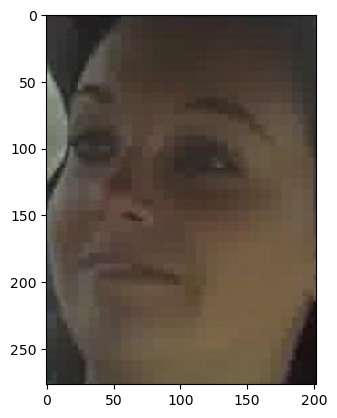

In [17]:
im = cv2.imread(images_path[111])
im1 = Image.open(images_path[111])
plt.imshow(im1, cmap='gray')
print(im.shape)

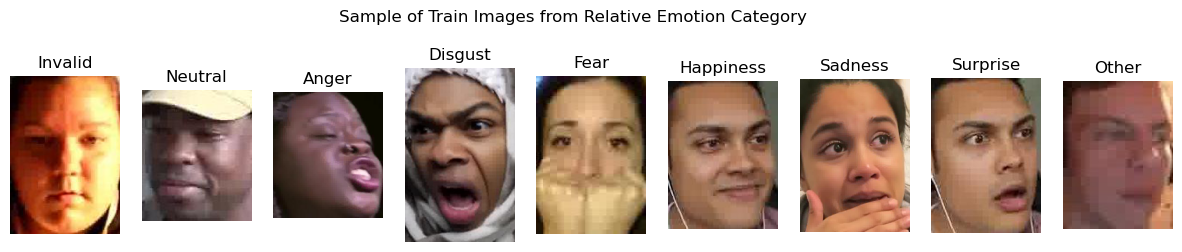

In [18]:
sample = [invalid_path[1], neutral_path[1], anger_path[2], disgust_path[12], 
          fear_path[33], happiness_path[2], sadness_path[2], surprise_path[4], other_path[123]]
categories = ['Invalid','Neutral','Anger','Disgust','Fear','Happiness','Sadness','Surprise','Other']
fig, axs = plt.subplots(1, 9, figsize=(15, 3))

for i, image_path in enumerate(sample):
    img = Image.open(image_path)
    axs[i].imshow(img,cmap='gray') #adjust imshow colormap to map colors back to original grayscaled images, will be greenish images without this 
    axs[i].axis('off')
    axs[i].set_title(categories[i])

plt.suptitle('Sample of Train Images from Relative Emotion Category')
plt.show()

In [71]:
len(other_path)

165378

In [73]:
other_path[15234]

'/Users/janrauhl/Documents/aff-wild-dataset/7/359_01907.jpg'

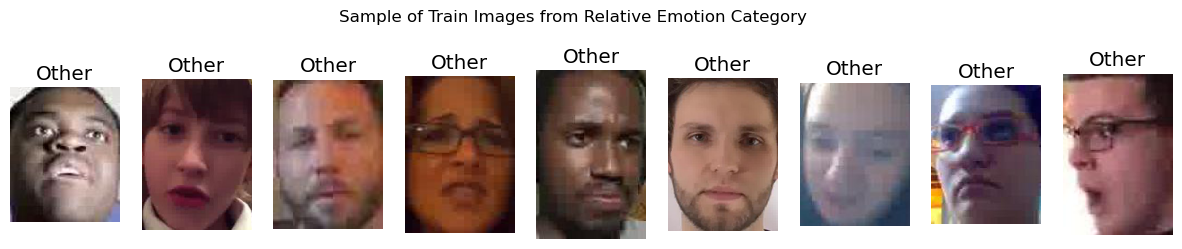

In [77]:
sample = [other_path[12], other_path[534], other_path[234], other_path[923], 
          other_path[333], other_path[777], other_path[634], other_path[1823], other_path[12592]]
categories = ['Other','Other','Other','Other','Other','Other','Other','Other','Other']
fig, axs = plt.subplots(1, 9, figsize=(15, 3))

for i, image_path in enumerate(sample):
    img = Image.open(image_path)
    axs[i].imshow(img,cmap='gray') #adjust imshow colormap to map colors back to original grayscaled images, will be greenish images without this 
    axs[i].axis('off')
    axs[i].set_title(categories[i])

plt.suptitle('Sample of Train Images from Relative Emotion Category')
plt.show()

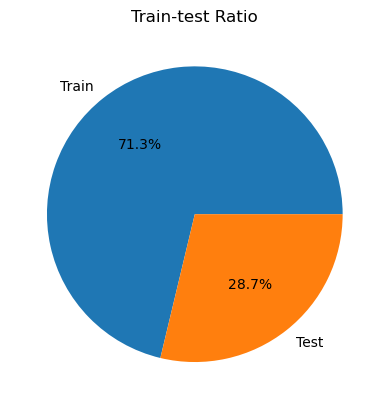

In [19]:
train_set_paths=list(paths.list_images('/Users/janrauhl/Documents/aff-wild-dataset'))
val_set_paths=list(paths.list_images('/Users/janrauhl/Documents/aff-wild-dataset-val'))
ratio = [len(train_set_paths),len(val_set_paths)]
labels = ['Train','Test']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.title('Train-test Ratio')
plt.show()

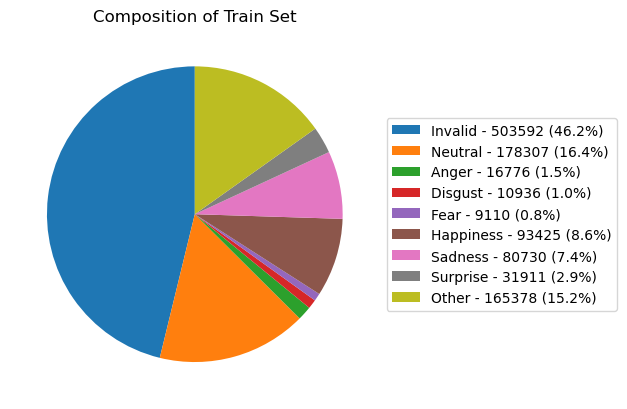

In [20]:
ratio = [len(invalid_path), len(neutral_path), len(anger_path), len(disgust_path), 
         len(fear_path), len(happiness_path), len(sadness_path), len(surprise_path), len(other_path)]
labels = ['Invalid','Neutral','Anger','Disgust','Fear','Happiness','Sadness','Surprise','Other']        
total_samples = sum(ratio)
#calculate the percentages and create the legend labels
legend_labels = [f'{label} - {count} ({count/total_samples*100:.1f}%)' for label, count in zip(labels, ratio)]
patches, texts = plt.pie(ratio, startangle=90)
plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1)) 
plt.title('Composition of Train Set')
plt.show()

## Notes
46.2% are invalid frames, should be disregarded. However, what does other means? 

# Train

In [30]:
batch_size = 16
img_height = 200 
img_width = 200 

In [52]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/janrauhl/Documents/Dissertation/Database-Access/Affwild2/aff_train', # directory path
    validation_split = None, 
    subset = None, 
    image_size = (img_height, img_width), # image size of height and width
    batch_size = batch_size # batch size
)

Found 1090165 files belonging to 9 classes.


In [53]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/janrauhl/Documents/aff-wild-dataset-val', # directory path
    validation_split = None, 
    subset = None, 
    image_size = (img_height, img_width), # image size of height and width
    batch_size = batch_size # batch size
)

Found 439734 files belonging to 9 classes.


In [24]:
class_names = training_ds.class_names
print(class_names)
print(len(class_names))

['-1', '0', '1', '2', '3', '4', '5', '6', '7']
9


In [25]:
# configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

# cache() keeps images in memory to ensure dataset does not become a bottleneck 
  # while training the model
# prefetch() overlaps data preprocessing and model execution while training
training_ds = training_ds.cache().prefetch(buffer_size = AUTOTUNE) # for training
testing_ds = testing_ds.cache().prefetch(buffer_size = AUTOTUNE) # for testing

In [42]:
#CNN model
CNN = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255), 
  layers.Conv2D(32, 3, activation = 'relu'),  # convolution layers
  layers.MaxPooling2D(), # maximum pooling layers
  layers.Conv2D(32, 3, activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation = 'relu'),
  layers.MaxPooling2D(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(512, activation = 'relu'), # dense layer
  layers.Dense(9, activation =  'softmax') # soft-max layer
])

#CNN with adam optimiser, sparse categorical crossentropy loss, and accuracy metrics
CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
#fit model to training and validation data, with 20 epochs
!pip install h5py

########## ONLY RUN ONCE
model_saved = CNN.fit(training_ds, validation_data= testing_ds, epochs = 20)

CNN.save(os.path.join("/Users/janrauhl/Documents/Dissertation/Aff-wild2","CNN_base.h5"))
test_loss, test_accuracy = CNN.evaluate(testing_ds, steps= 10)

Epoch 1/20
68136/68136 [==============================] - 5672s 83ms/step - loss: 0.8708 - accuracy: 0.6637 - val_loss: 2.8854 - val_accuracy: 0.3025
Epoch 2/20
68136/68136 [==============================] - 5738s 84ms/step - loss: 0.5801 - accuracy: 0.7663 - val_loss: 3.6081 - val_accuracy: 0.2847
Epoch 3/20
68136/68136 [==============================] - 5756s 84ms/step - loss: 0.5003 - accuracy: 0.7987 - val_loss: 5.1891 - val_accuracy: 0.2626
Epoch 4/20
68136/68136 [==============================] - 5732s 84ms/step - loss: 0.4553 - accuracy: 0.8168 - val_loss: 6.0828 - val_accuracy: 0.2712
Epoch 5/20
68136/68136 [==============================] - 5730s 84ms/step - loss: 0.4260 - accuracy: 0.8291 - val_loss: 4.7186 - val_accuracy: 0.2705
Epoch 6/20
68136/68136 [==============================] - 5770s 85ms/step - loss: 0.4033 - accuracy: 0.8387 - val_loss: 5.5099 - val_accuracy: 0.2561
Epoch 7/20
68136/68136 [==============================] - 5767s 85ms/step - loss: 0.3871 - accuracy:

/opt/homebrew/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 0s 24ms/step - loss: 5.2976 - accuracy: 0.2562


In [43]:
CNN.save(os.path.join("/Users/janrauhl/Documents/Dissertation/Aff-wild2","CNN_base.keras"))

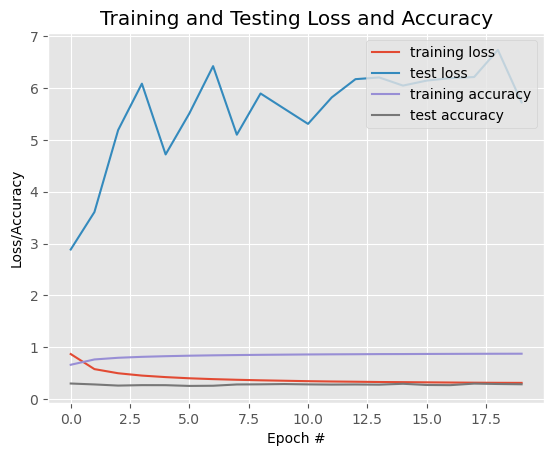

In [44]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), model_saved.history['loss'], 
         label = 'training loss') # training loss
plt.plot(np.arange(0, N), model_saved.history['val_loss'], 
         label = 'test loss') # testing loss
plt.plot(np.arange(0, N), model_saved.history['accuracy'], 
         label = 'training accuracy') # training accuracy
plt.plot(np.arange(0, N), model_saved.history['val_accuracy'], 
         label = 'test accuracy') # testing accuracy
plt.title("Training and Testing Loss and Accuracy") # title of comparative line graph
plt.xlabel("Epoch #") # x axis label
plt.ylabel("Loss/Accuracy") # y axis label
plt.legend(loc = "upper right") # legend

# Efficient Net

In [47]:
for images, labels in training_ds:
    print(labels.shape)
    print(labels)
    break

for images, labels in testing_ds:
    print(labels.shape)
    print(labels)
    break

(16,)
tf.Tensor([0 8 1 0 0 0 0 1 5 1 5 0 0 0 0 5], shape=(16,), dtype=int32)
(16,)
tf.Tensor([2 8 0 1 8 0 1 2 8 3 1 1 0 8 0 8], shape=(16,), dtype=int32)


In [54]:
# One-hot encode the labels
def one_hot_encode(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

# Apply one-hot encoding to the dataset
training_ds = training_ds.map(one_hot_encode)
testing_ds = testing_ds.map(one_hot_encode)

In [55]:
#set callback to stop training when accuracy reached 85%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>=0.850):
            print("\nReached 85% accuracy so cancelling training!")
            self.model.stop_training = True
            
            
callbacks = myCallback()

In [56]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# num_classes = len(class_names)
img_channels = 3
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))
for layer in base_model.layers:
    layer.trainable = False

effnet = Sequential()
effnet.add(base_model)
effnet.add(GlobalAveragePooling2D())
effnet.add(Dense(256, activation='relu'))
effnet.add(Dense(9, activation='softmax'))
effnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_saved = effnet.fit(training_ds, validation_data=testing_ds, epochs=20, callbacks = [callbacks])
effnet.save("/Users/janrauhl/Documents/Dissertation/Aff-wild2/efficientnet_base.h5")

Epoch 1/20
68136/68136 [==============================] - 9794s 144ms/step - loss: 0.7278 - accuracy: 0.7089 - val_loss: 2.5054 - val_accuracy: 0.3324
Epoch 2/20
68136/68136 [==============================] - 9860s 145ms/step - loss: 0.5926 - accuracy: 0.7597 - val_loss: 2.7068 - val_accuracy: 0.3314
Epoch 3/20
68136/68136 [==============================] - 9726s 143ms/step - loss: 0.5476 - accuracy: 0.7778 - val_loss: 2.9993 - val_accuracy: 0.3244
Epoch 4/20
68136/68136 [==============================] - 9802s 144ms/step - loss: 0.5204 - accuracy: 0.7891 - val_loss: 3.1298 - val_accuracy: 0.3211
Epoch 5/20
68136/68136 [==============================] - 9734s 143ms/step - loss: 0.5010 - accuracy: 0.7971 - val_loss: 2.9453 - val_accuracy: 0.3304
Epoch 6/20
68136/68136 [==============================] - 9702s 142ms/step - loss: 0.4860 - accuracy: 0.8033 - val_loss: 3.1686 - val_accuracy: 0.3342
Epoch 7/20
68136/68136 [==============================] - 9767s 143ms/step - loss: 0.4736 - ac

/opt/homebrew/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
test_loss, test_accuracy = effnet.evaluate(testing_ds, steps= 10)

10/10 [==============================] - 1s 97ms/step - loss: 3.9451 - accuracy: 0.2937


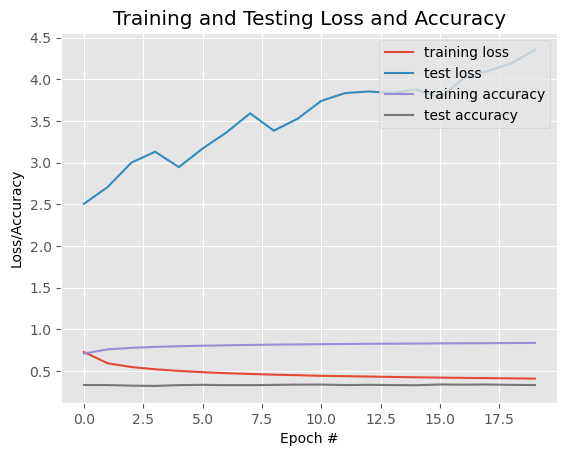

In [58]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), model_saved.history['loss'], 
         label = 'training loss') # training loss
plt.plot(np.arange(0, N), model_saved.history['val_loss'], 
         label = 'test loss') # testing loss
plt.plot(np.arange(0, N), model_saved.history['accuracy'], 
         label = 'training accuracy') # training accuracy
plt.plot(np.arange(0, N), model_saved.history['val_accuracy'], 
         label = 'test accuracy') # testing accuracy
plt.title("Training and Testing Loss and Accuracy") # title of comparative line graph
plt.xlabel("Epoch #") # x axis label
plt.ylabel("Loss/Accuracy") # y axis label
plt.legend(loc = "upper right") # legend

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

# num_classes = len(training_ds.class_names)

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))
for layer in base_model.layers:
    layer.trainable = False

effnet = Sequential()
effnet.add(base_model)
effnet.add(GlobalAveragePooling2D())
effnet.add(Dense(256, activation='relu'))
effnet.add(Dense(num_classes, activation='softmax'))
effnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_saved = effnet.fit(training_ds, validation_data=testing_ds, epochs=20)
effnet.save("/Users/janrauhl/Documents/Dissertation/FER/efficientnet_base.h5")

In [38]:
class_names


['-1', '0', '1', '2', '3', '4', '5', '6', '7']

# Perform digital image preprocessing


## overfitting --> regularization 

own cnn architecture + effnet? ensemble? 


face detection first in video then crop, then preprocess then predict? then output video to see change of emotion? calculate overall emotion in one video? 

Do we aim to calculate emotion in one video? 

add bayesian to calculate probability